In [1]:
#!/usr/bin/env/python3

# Ganesh Arvapalli

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Declare necessary constants

# Conductances
gmax_Na = 120    # in mmho/cm^2
gmax_K = 36
gmax_L = 0.3

# Capacitance
C = 1     # In uF/cm^2

# Potentials
Vna = 115    # Ena - Er, E = -RT/nF ln(Q) in mV
Vk = -12
Vl = 10.613

In [4]:
# Declare relevant functions
# Change V's to -V's to get nice AP shape (peaking upwards instead of down)
alpha_n = lambda V: 0.01 * ((-V + 10) / (np.exp((-V + 10) / 10) - 1))
beta_n = lambda V: 0.125 * np.exp(-V/80)
alpha_m = lambda V: 0.1 * ((-V + 25) / (np.exp((-V + 25) / 10) - 1))
beta_m = lambda V: 4 * np.exp(-V / 18)
alpha_h = lambda V: 0.07 * np.exp(-V / 20)
beta_h = lambda V: 1.0 / (1 + np.exp((-V + 30) / 10))

In [122]:
# Declare input current as list of numbers spaced at "dt" apart

duration = 20   # in ms
dt = 0.01    # time step

I_in = np.zeros(int(1/dt))     # Wait 1 ms
I_in = np.append(I_in, 150 * np.ones(50))   # In uA/cm^2
I_in = np.append(I_in, np.zeros(int(duration/dt) - len(I_in)))     # Turn off current

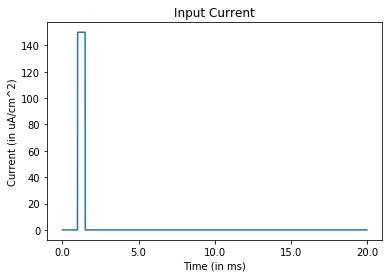

In [123]:
# Plot input current
num_ticks = 5
fig, ax = plt.figure(), plt.axes()
ax.plot(I_in);
ax.set_title("Input Current");
ax.set_xlabel("Time (in ms)");
ax.set_ylabel("Current (in uA/cm^2)");
plt.xticks(np.linspace(0,duration/dt,num_ticks), 
           np.linspace(0, duration/dt,num_ticks) * dt);

In [124]:
# Initial values

V_init = 0
a_n, a_m, a_h = alpha_n(V_init), alpha_m(V_init), alpha_h(V_init)
b_n, b_m, b_h = beta_n(V_init), beta_m(V_init), beta_h(V_init)
n = a_n / (a_n + b_n)
m = a_m / (a_m + b_m)
h = a_h / (a_h + b_h)
print("n_init", np.round(n, 3), "\nm_init", 
      np.round(m, 3), "\nh_init", np.round(h, 3))

n_init 0.318 
m_init 0.053 
h_init 0.596


In [125]:
V = np.zeros(np.shape(I_in))
V[0] = V_init

for i in range(len(I_in) - 1):
    dn = dt * (alpha_n(V[i]) * (1 - n) - beta_n(V[i]) * n)
    dm = dt * (alpha_m(V[i]) * (1 - m) - beta_m(V[i]) * m)
    dh = dt * (alpha_h(V[i]) * (1 - h) - beta_h(V[i]) * h)
    
    n, m, h = n + dn, m + dm, h + dh
    
    I_Na = gmax_Na * (m**3) * h * (V[i] - Vna)
    I_K = gmax_K * (n**4) * (V[i] - Vk)
    I_L = gmax_L * (V[i] - Vl)
    I_c = I_in[i] - I_Na - I_K - I_L
    
    dV = (1 / C) * I_c * dt
    V[i+1] = V[i] + dV

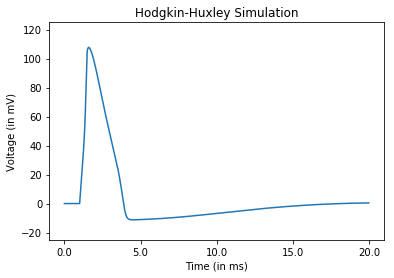

In [126]:
fig, ax = plt.figure(), plt.axes()
ax.plot(V);
ax.set_title("Hodgkin-Huxley Simulation");
ax.set_xlabel("Time (in ms)");
ax.set_ylabel("Voltage (in mV)");
plt.xticks(np.linspace(0,duration/dt,num_ticks), 
           np.linspace(0, duration/dt,num_ticks) * dt);
plt.ylim((-25,125));